### Utiliser la méthode du coude pour déterminer le nombre optimal de clusters.

Chargement de données

In [2]:
import pandas as pd
import os

df_standard = pd.read_csv(os.getcwd() + '/../data/processed/dataset-standard.csv')

Utilisation de la méthode du coude, pour detecter K

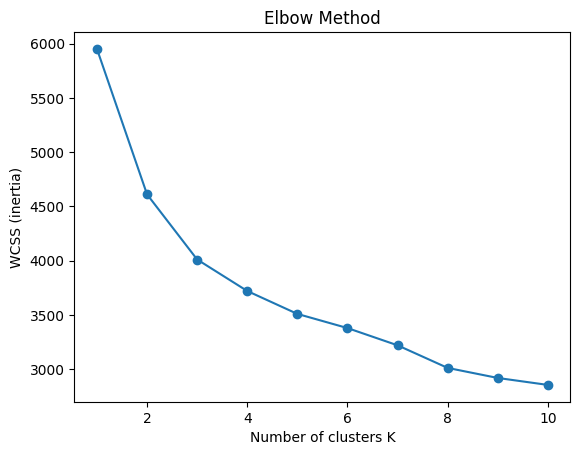

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standard)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method")
plt.show()

Utilisation de la méthode de silhouette, pour detecter K

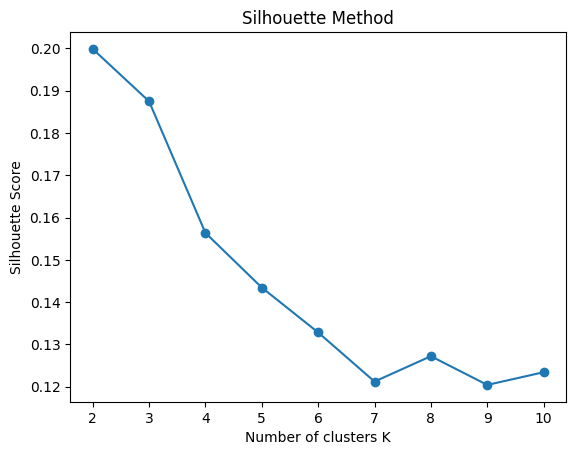

In [4]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):  # Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_standard)
    score = silhouette_score(df_standard, labels)
    sil_scores.append(score)

# Plot
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

D’après les résultats des deux méthodes, la valeur optimale de K est 2.